# Чтение аудиофайлов

In [2]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt



## Загрузка данных из аудиофайла

In [4]:
note_A = 'sounds of notes/zvuk-notyi-lya.wav'
frequency, data = read(note_A)
frequency #частота дискретизации

44100

In [5]:
data.shape

(22071, 2)

In [6]:
type(data)

numpy.ndarray

Импортируем данные звука ноты Ля, определяем частоту дискретизации, определяем количество аудиоканалов и проверяем тип данных (стерео/моно).
Функция read  возвращает чатоту дискретизации frequency и аудиоданные data.

In [7]:
data

array([[  20, -616],
       [  18, -785],
       [  41, -796],
       ...,
       [ -90,  -17],
       [-139,   30],
       [-129,   23]], dtype=int16)

## Чтение данных

**Считываем данные с левого и правого канала:**

In [8]:
left_channel = data[:,0]
left_channel

array([  20,   18,   41, ...,  -90, -139, -129], dtype=int16)

In [9]:
right_channel = data[:,1]
right_channel

array([-616, -785, -796, ...,  -17,   30,   23], dtype=int16)

**Создаем вектор времени для корректного определения длины данных:**

In [10]:
timeline = np.arange(right_channel.size)*(1/frequency)

## Построение графика

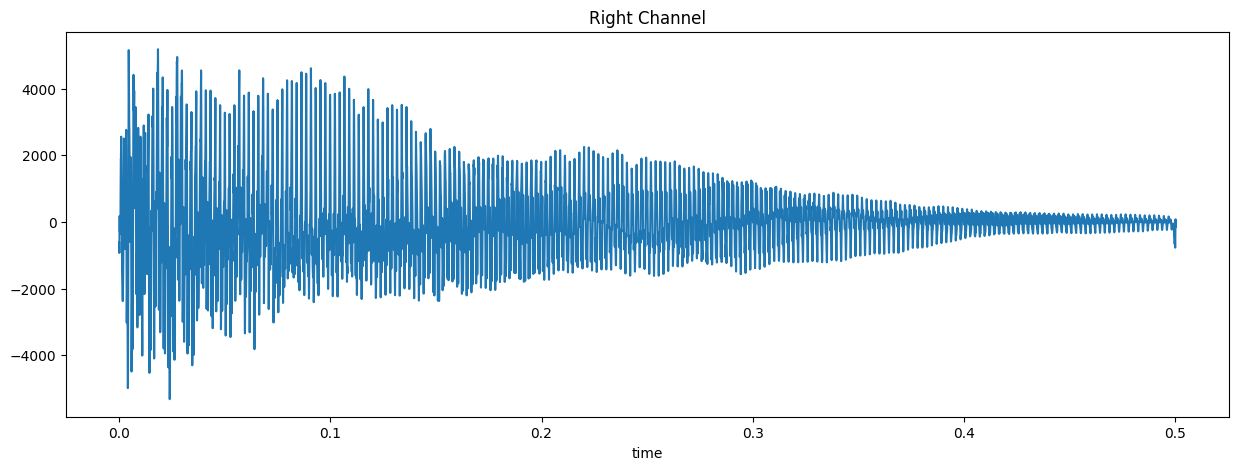

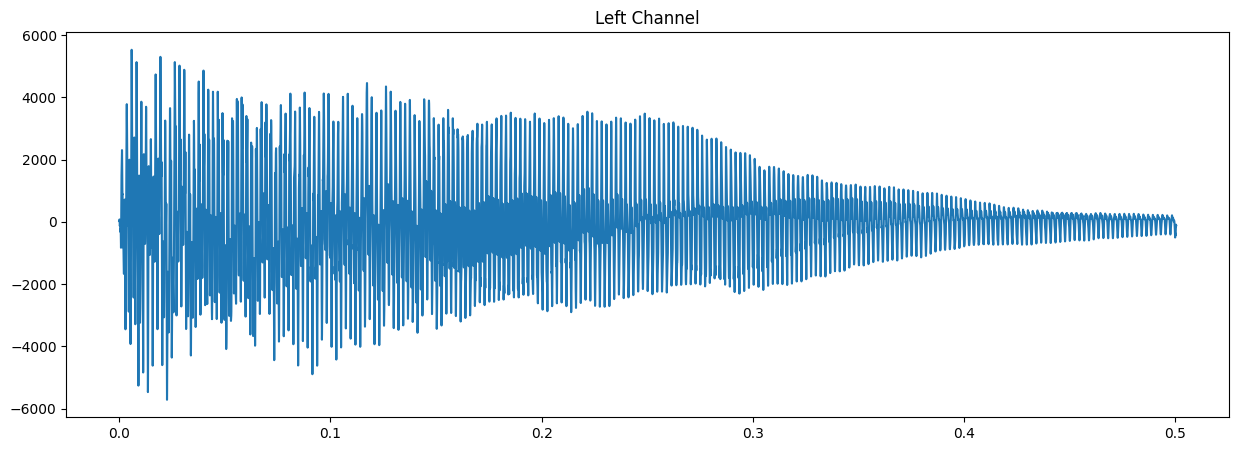

In [11]:
plt.figure(figsize=(15,5))
plt.title('Right Channel')
plt.xlabel('time')
plt.plot(timeline, right_channel)

plt.figure(figsize=(15,5))
plt.title('Left Channel')
plt.plot(timeline, left_channel)

**Проверка другого файла**

Мелодия сыгранная на фортепиано длиной 10 сек.

In [14]:
fp = 'sounds/fortepiano_1.wav'
fq, data = read(fp)
fq

44100

In [15]:
data.shape

(460271, 2)

In [16]:
type(data)

numpy.ndarray

In [17]:
left = data[:,0]
right = data[:,1]

time = np.arange(right.size)*(1/fq)
time_len = right.size / fq
time_len

10.436984126984127

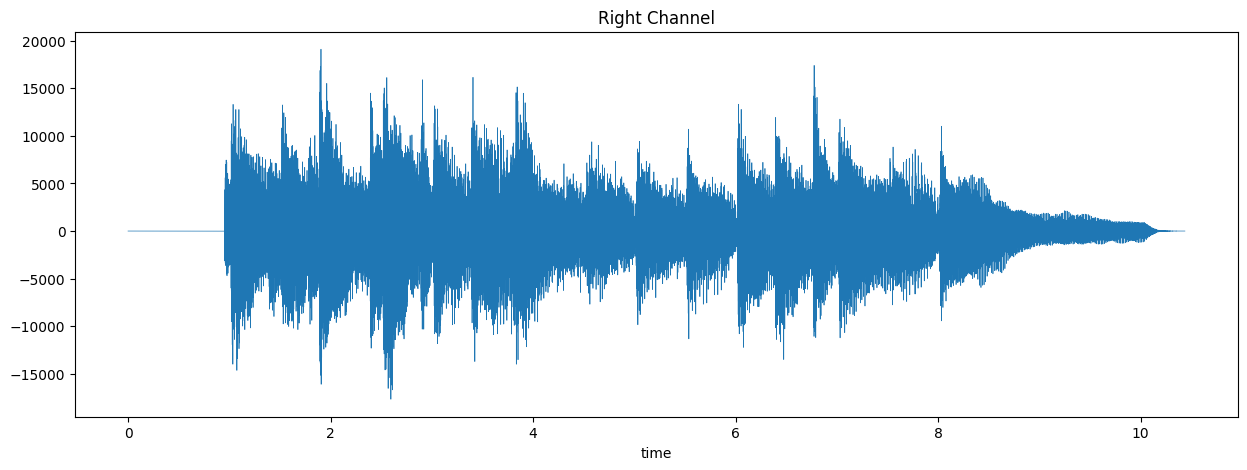

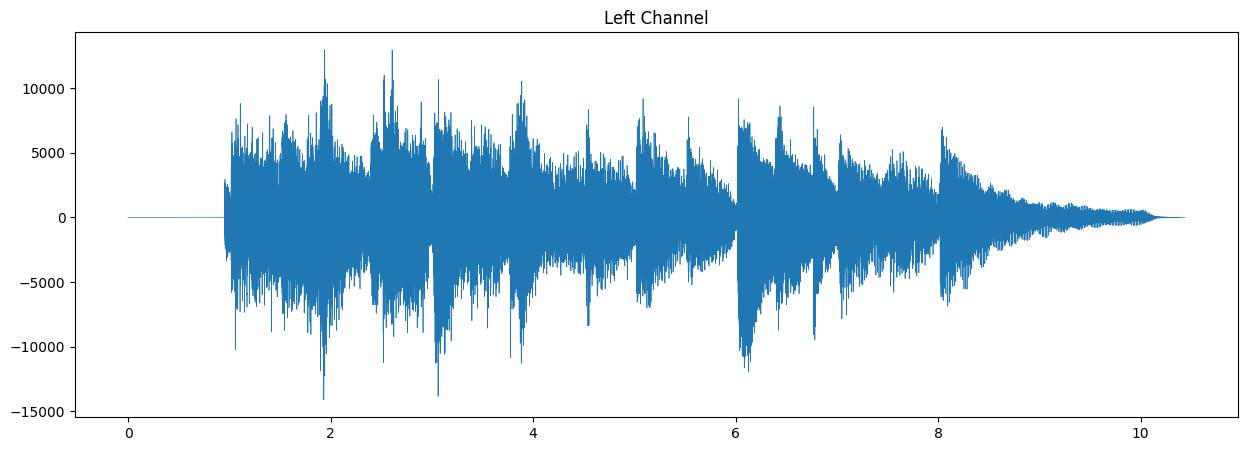

In [18]:
plt.figure(figsize=(15,5))
plt.title('Right Channel')
plt.xlabel('time')
plt.plot(time, right, linewidth = 0.5)

plt.figure(figsize=(15,5))
plt.title('Left Channel')
plt.plot(time, left, linewidth = 0.5)

## Анализ стерео и моно звука, преобразование стерео в моно

Вывод 10 сек звука пианино в стерео:

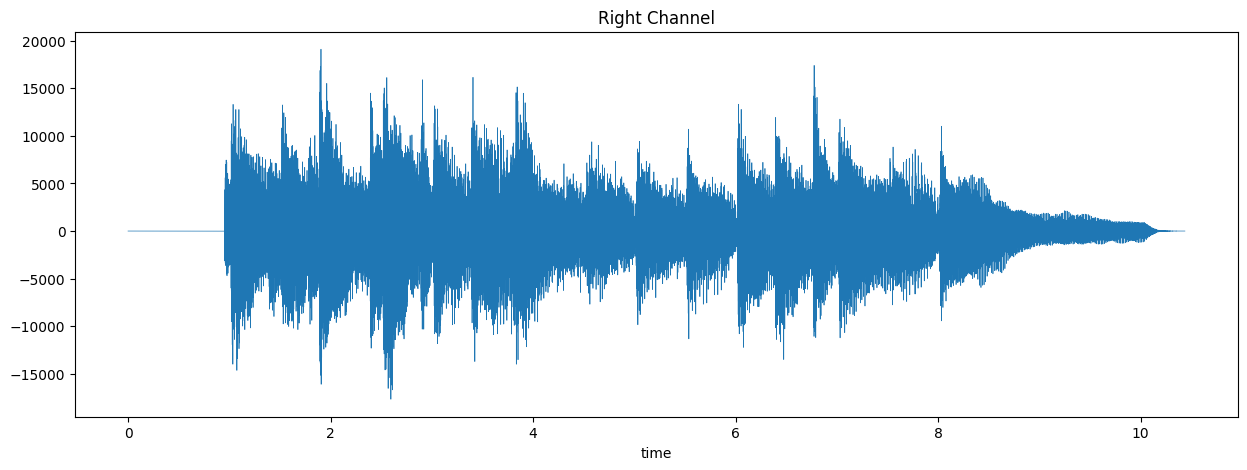

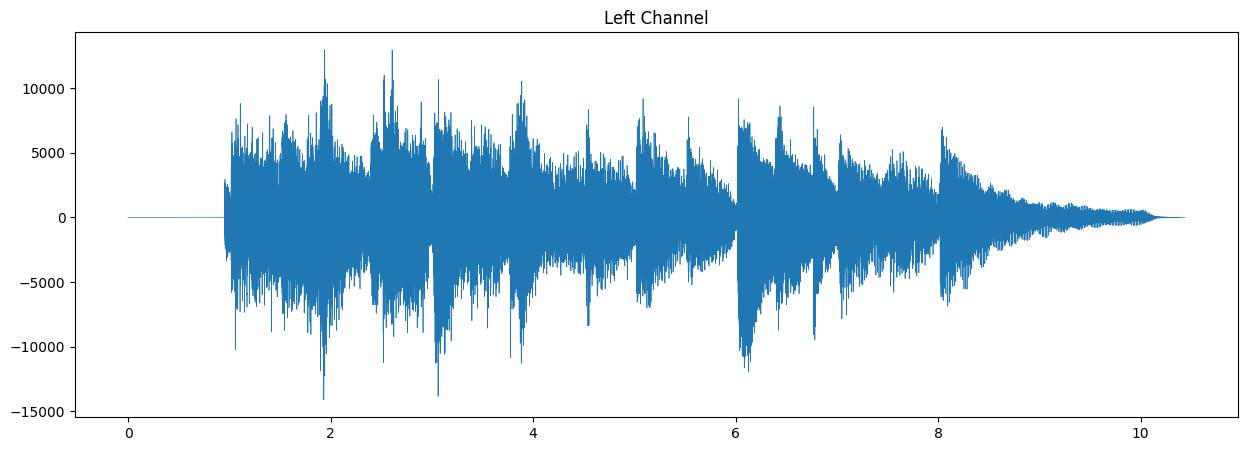

In [19]:
plt.figure(figsize=(15,5))
plt.title('Right Channel')
plt.xlabel('time')
plt.plot(time, right, linewidth = 0.5)

plt.figure(figsize=(15,5))
plt.title('Left Channel')
plt.plot(time, left, linewidth = 0.5)

Чтение того же файла, конвертированного в моно:

In [21]:
fp_mono = 'sounds/fortepiano_1_mono.wav'
fq_mono, data_mono = read(fp_mono)
data_mono.shape

(460271,)

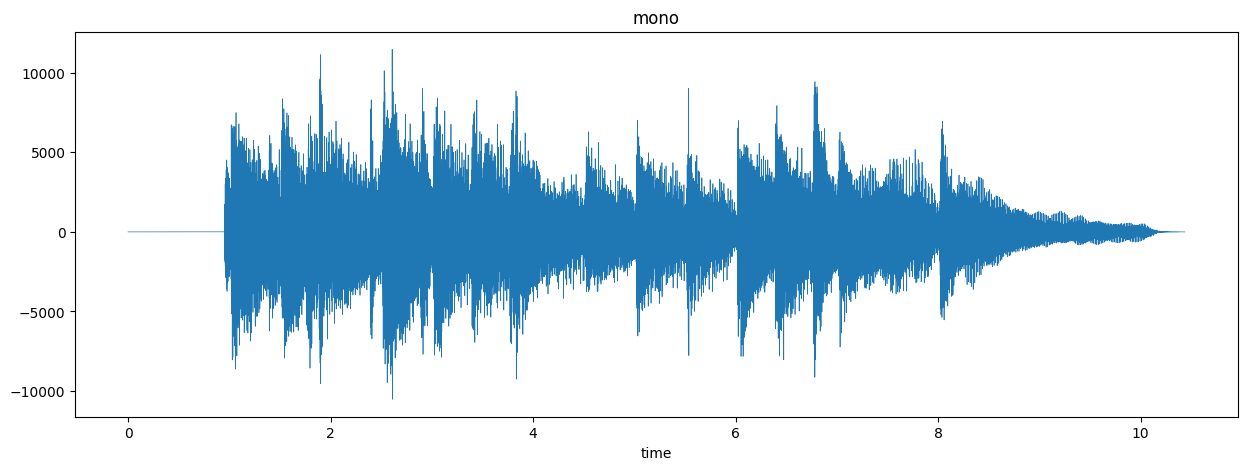

In [22]:
plt.figure(figsize=(15,5))
plt.title('mono')
plt.xlabel('time')
plt.plot(time, data_mono, linewidth = 0.5)

Сравнение двух стерео каналов и одного моно:

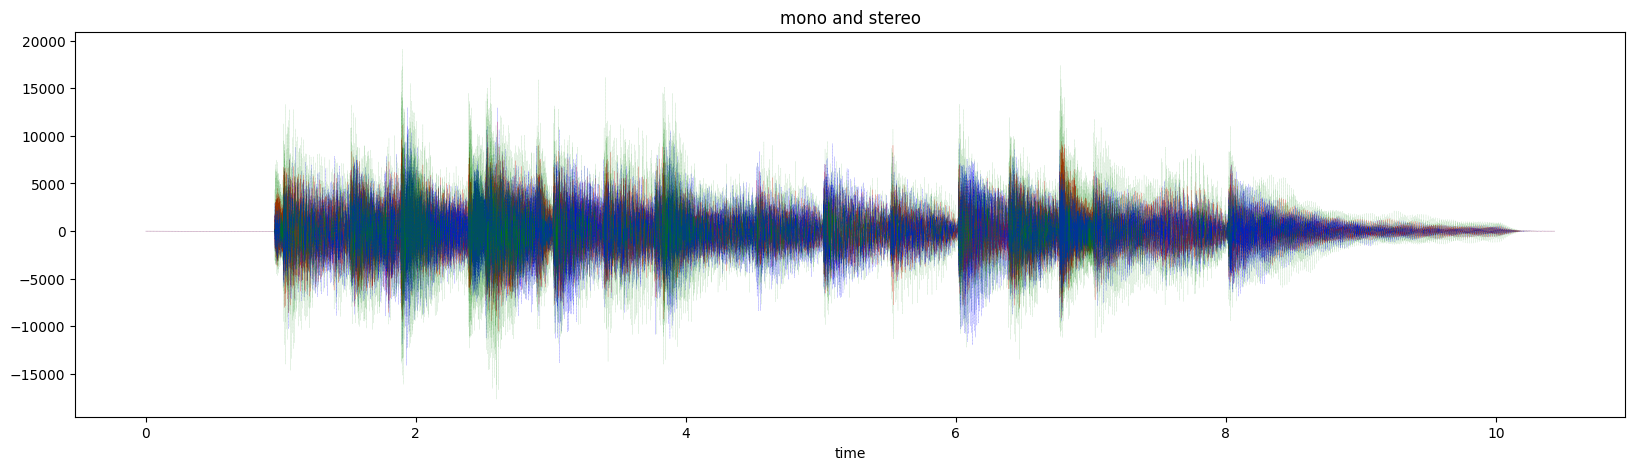

In [23]:
plt.figure(figsize=(20,5))
plt.title('mono and stereo')
plt.xlabel('time')
plt.plot(time, data_mono, linestyle='-', color = 'red', linewidth = 0.1)
plt.plot(time, left,linestyle='-.', color = 'blue', linewidth = 0.1)
plt.plot(time, right, linestyle=':', color = 'green', linewidth = 0.1)

**Попробуем создать моно звук из двух стерео, на основе предположений**

Поиск среднего значения между двумя стерео каналами:

In [24]:
mono1 = (left+right)/2
comparison = mono1 == data_mono
np.count_nonzero(comparison == False)


209070

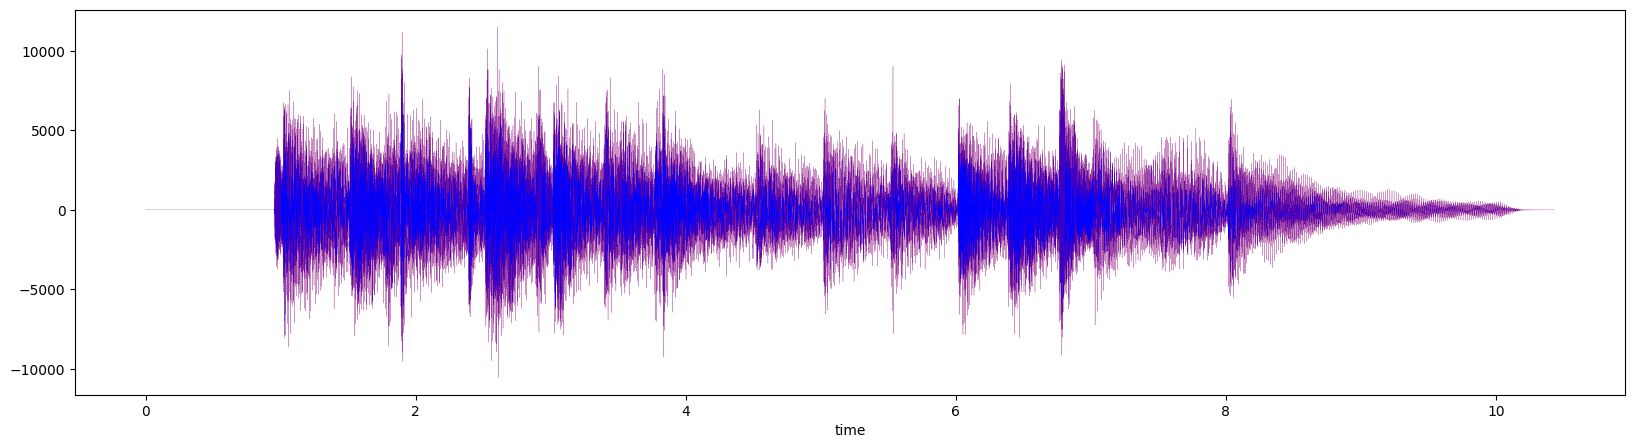

In [25]:
plt.figure(figsize=(20,5))
plt.xlabel('time')
plt.plot(time, data_mono, linestyle='-', color = 'red', linewidth = 0.1)
plt.plot(time, mono1,linestyle='-.', color = 'blue', linewidth = 0.1)


Способ не подходит (?), проверю позже при выводе звука

Способ суммирования сигналов:

Вычетание одного сигнала из другого (инвертирование фазы одного, затем добавление к другому):

**Конвертирование стерео в моно с помощью библиотеки torch и torchaudio:**

In [31]:
import torch
import torchaudio

In [32]:
data, sr = torchaudio.load('sounds/fortepiano_1.wav')
mono2 = torch.mean(data, dim=0, keepdim=True)

RuntimeError: Couldn't find appropriate backend to handle uri sounds/fortepiano_1.wav and format None.

In [33]:
mono1

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
mono2 = np.array(mono2[-1])
mono2

NameError: name 'mono2' is not defined

NameError: name 'mono2' is not defined

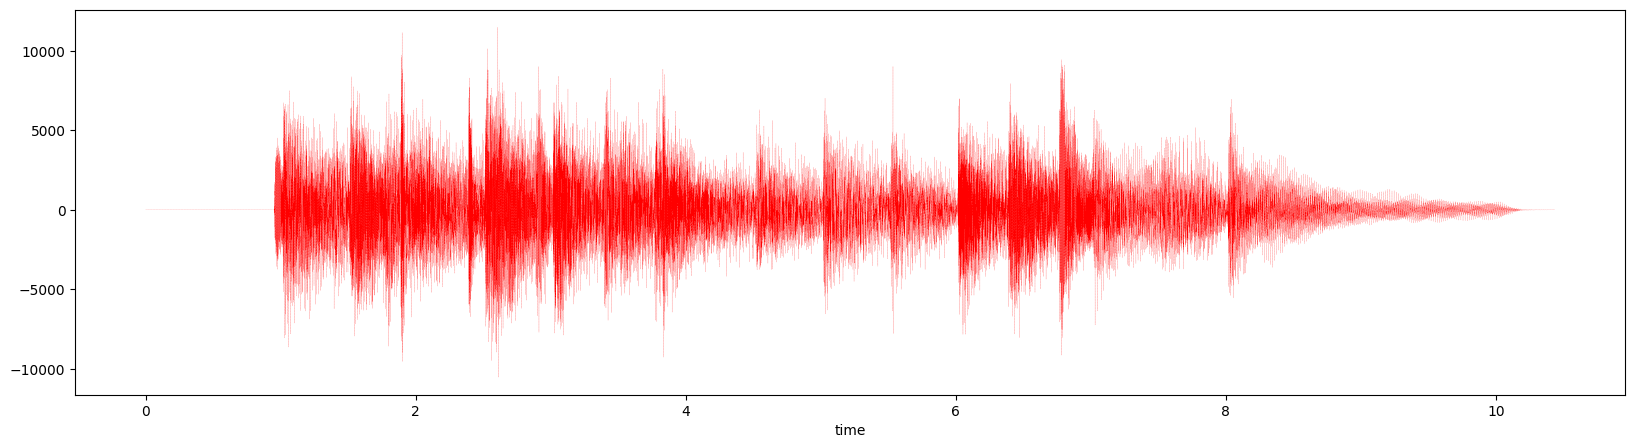

In [35]:
plt.figure(figsize=(20,5))
plt.xlabel('time')
plt.plot(time, data_mono, linestyle='--', color = 'red', linewidth = 0.1)
plt.plot(time, mono2,linestyle='-', color = 'blue', linewidth = 1)

Странно, но способ не сработал.

**Следующий вариант сложить  вправо/2 + влево/2.**


In [ ]:
fp = '/sounds/fortepiano_1.wav'
fs, data = read(fp)

mono3 = (data[:,0]/2) + (data[:,1]/ 2)

plt.figure(figsize=(20,5))
plt.xlabel('time')
plt.xlim([1, 1.1])
plt.ylim([-5000, 5000])
plt.plot(time, data_mono, linestyle='--', color = 'red', linewidth = 1)
plt.plot(time, mono3,linestyle='dotted', color = 'blue', linewidth = 1)

In [ ]:
comparison = mono3 == data_mono
np.count_nonzero(comparison == False)

In [ ]:
comparison = mono3 == mono1
np.count_nonzero(comparison == False)

Результат такой же, как и в первом варианте.

In [ ]:
plt.figure(figsize=(20,5))
plt.xlabel('time')
plt.xlim([1, 1.2])
plt.ylim([-5000, 5000])
plt.plot(time, mono1, linestyle='-', color = 'red', linewidth = 1)
plt.plot(time, mono3,linestyle='-.', color = 'blue', linewidth = 1)

## Построение спектра

In [39]:
from scipy.fft import fft, fftfreq

fp = 'sounds/fortepiano_1_mono.wav'
fs, data = read(fp)
time = np.arange(right.size)*(1/fs)

In [40]:
y = fft(data)
x = fftfreq(len(data), 1 / fs)

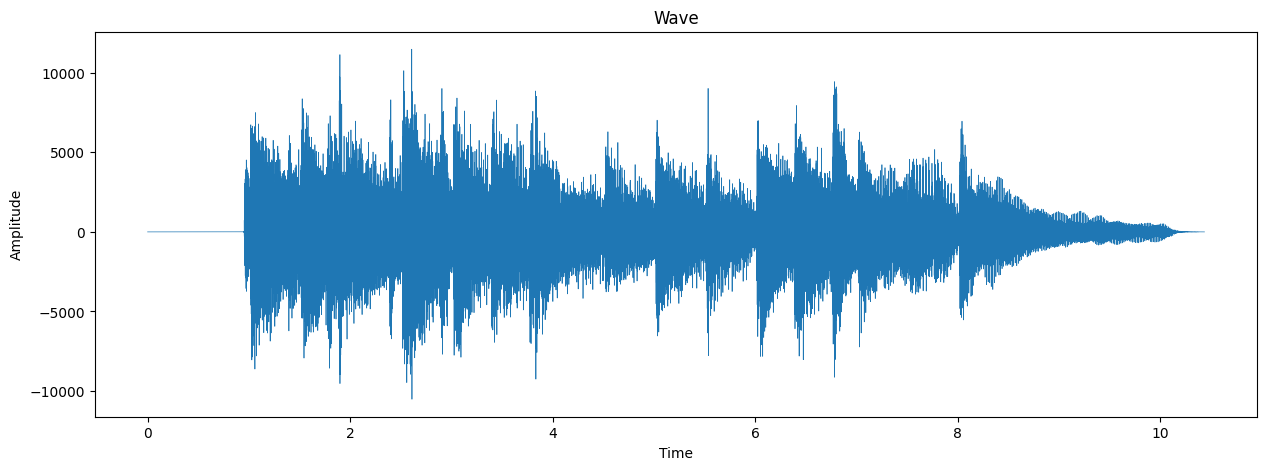

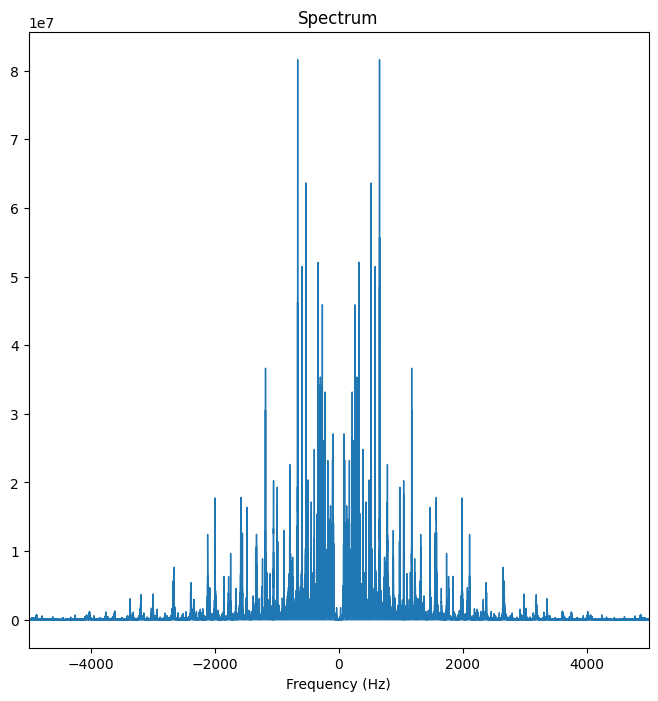

In [41]:
plt.figure(figsize=(15,5))
plt.title('Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(time, data, linewidth = 0.5)

plt.figure(figsize=(8, 8))
plt.xlim([-5000, 5000])
plt.title('Spectrum')
plt.xlabel('Frequency (Hz)')
plt.plot(x, np.abs(y), linewidth = 1)


##  Проигрывание аудио

Вариант 1, библиотека librosa:

In [29]:
pip install librosa

^C
Note: you may need to restart the kernel to use updated packages.
   ---------------------------------------- 0.0/253.7 kB ? eta -:--:--
   ------------ --------------------------- 81.9/253.7 kB 1.5 MB/s eta 0:00:01
   -------------------------------------- - 245.8/253.7 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 253.7/253.7 kB 2.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------  297.0/301.2 kB 9.2 MB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 6.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/75.3 kB ? eta -:--:--
   ---------------------------------------- 75.3/75.3 kB 4.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   -------------- ------------------------- 1.0/2.7 MB 20.9 MB/s eta 0:00:01
   --------------------------------- ------ 2.2/2.7 MB 23.7 MB/s eta 0:00:01
   ----------------

In [28]:
import IPython.display as ipd
import librosa
import librosa.display
import IPython

data, fs = librosa.load('sounds/fortepiano_1_mono.wav')
plt.figure(figsize=(15,5))
librosa.display.waveshow(data)
ipd.Audio(fp)

ModuleNotFoundError: No module named 'librosa'

In [ ]:
data, fs = librosa.load('/sounds/fortepiano_1.wav')
plt.figure(figsize=(15,5))
librosa.display.waveshow(data)
ipd.Audio(fp)

Вариант 2, плеер playsound:

In [ ]:
#pip install

In [ ]:
from playsound import playsound

playsound('/sounds/fortepiano_1_mono.wav')

Вариант 3, библиотека Pydub:

In [ ]:
#pip install pydub

In [ ]:
from pydub import AudioSegment
from pydub.playback import play

song = AudioSegment.from_wav('/sounds/fortepiano_1.wav')
play(song)

???